<a href="https://colab.research.google.com/github/AriB020100/GW_CourseWork/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

## The Q

1. Generate a plot of a sinusoid with a frequency $𝑓_0$ given by the last two  digits of your student ID.
2. You should ensure that the time series has an initial time $𝑡_0$ = 0, and you should take a sampling
frequency $𝑓_s$ = 500 Hz and choose a duration so that you can clearly see three well-resolved
cycles of the sinusoid.
3. Next, add another sinusoid to the same figure, but with a frequency $𝑓_s − 𝑓_0$. Comment on the
result with reference to the idea of aliasing (you may wish to modify the second sinusoid for
demonstration).

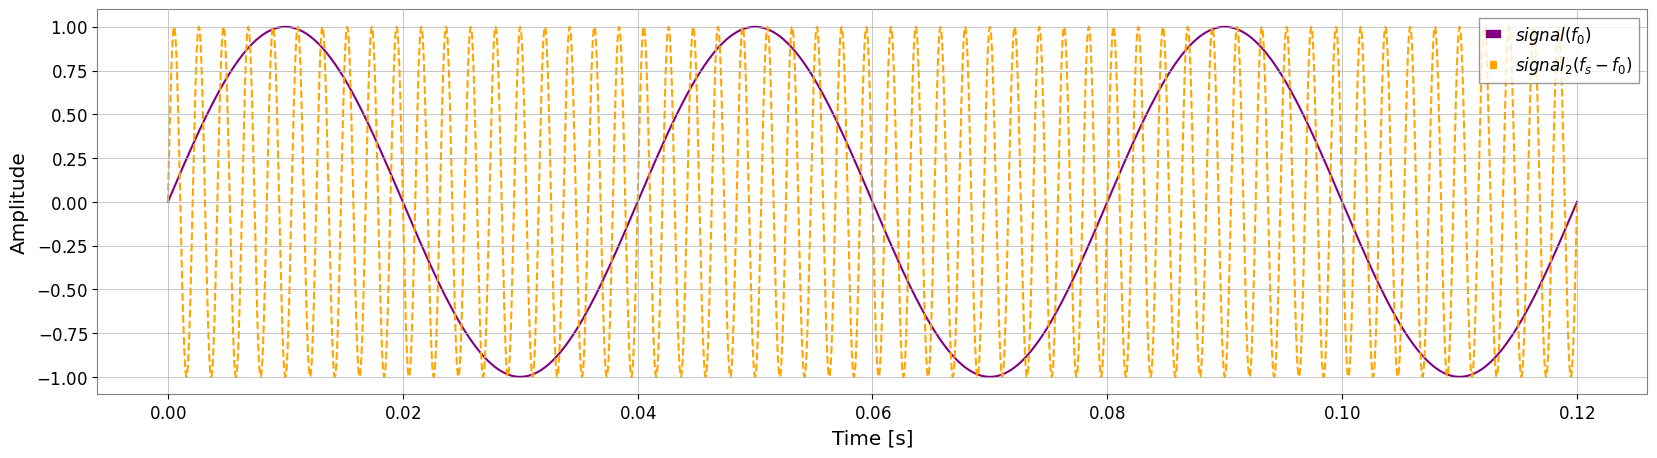

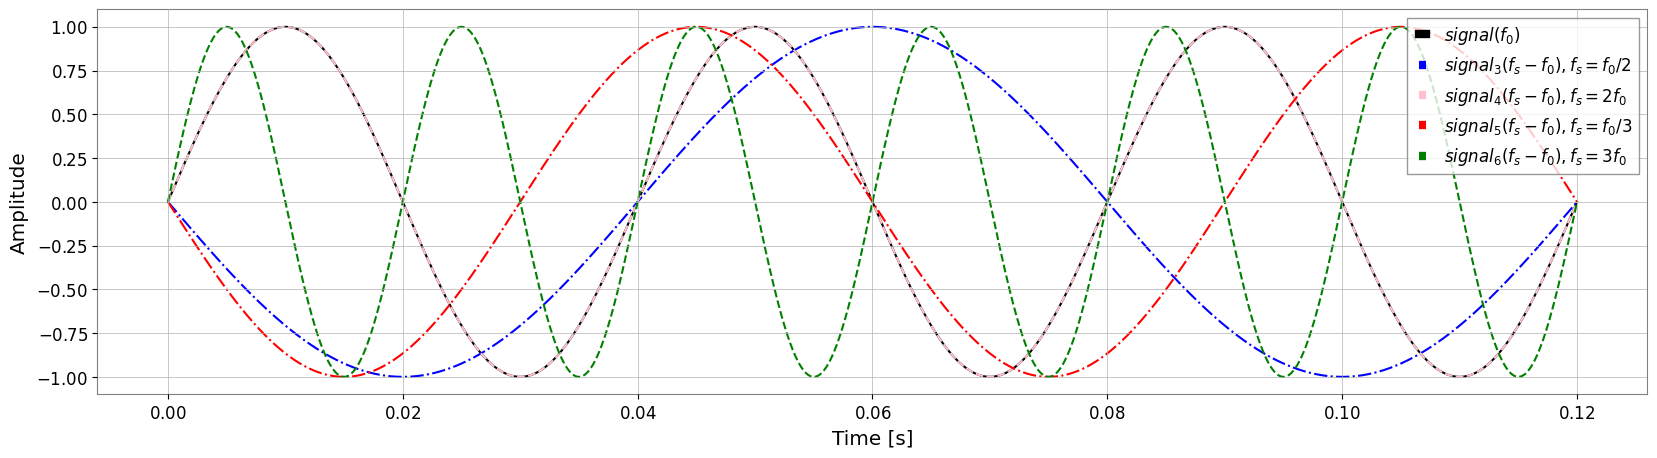

In [65]:
import matplotlib.pyplot as plt
import numpy as np


# setting values
f_0 = 25 # Hz
T = 3 * (1/f_0) # 3 cycles
t_0 = 0
f_s = 500

# setting equations
t = np.linspace(t_0, T, 5000)
signal = np.sin(2 * np.pi * f_0 * t)
signal_2 = np.sin(2 * np.pi * (f_s - f_0) * t)
# sampling = np.sin(2 * np.pi * f_s * t) # just checking f_s

signal_3 = np.sin(2 * np.pi * (f_0/2 - f_0) * t)

signal_4 = np.sin(2 * np.pi * (f_0*2 - f_0) * t)

signal_5 = np.sin(2 * np.pi * (f_0/3 - f_0) * t)

signal_6 = np.sin(2 * np.pi * (f_0*3 - f_0) * t)




# figure size
plt.figure(figsize=(20,5))

# plotting
plt.plot(t, signal, color='purple', label=f'$signal(f_0)$')
plt.plot(t, signal_2, color='orange', linestyle ='--', label=f'$signal_2(f_s - f_0)$')
# plt.plot(t, sampling, color='green', linestyle =':', label=f'$sample(f_s)$') # just checking f_s
# plt.plot(t, signal_3, color='blue', linestyle ='--', label=f'$signal_2(f_s - f_0)$')
# plt.plot(t, signal_4, color='pink', linestyle ='--', label=f'$signal_2(f_s - f_0)$')
# plt.plot(t, signal_5, color='red', linestyle ='--', label=f'$signal_2(f_s - f_0)$')
# plt.plot(t, signal_6, color='green', linestyle ='--', label=f'$signal_2(f_s - f_0)$')




# axis / titile / legend
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc="best")

# show plot
plt.show()

# figure size
plt.figure(figsize=(20,5))

# plotting
plt.plot(t, signal, color='black', label=f'$signal(f_0)$')
plt.plot(t, signal_3, color='blue', linestyle ='-.', label=f'$signal_3(f_s - f_0), f_s = f_0/2$')
plt.plot(t, signal_4, color='pink', linestyle ='--', label=f'$signal_4(f_s - f_0), f_s = 2f_0$')
plt.plot(t, signal_5, color='red', linestyle ='-.', label=f'$signal_5(f_s - f_0), f_s = f_0/3$')
plt.plot(t, signal_6, color='green', linestyle ='--', label=f'$signal_6(f_s - f_0), f_s = 3f_0$')

# axis / titile / legend
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc="best")

# show plot
plt.show()

The top figure clearly shows that the sigal of 25 Hz can be reconstructed well from the sampling frequancy of 500 Hz and technically also reconstruct signals of higher frecancies than 25 - most probably 20 peaks / 2 times more than 25 Hz which is 250 Hz and the same as half of the sampling frecancies. The 20 peakes is based on 20 peakes of the orange signal between the peaks of the original signal. And the divide by two is based on waves having 1 peak and 1 trough.

The second figure shows this in practice the black plot is ment to be the original signal which is overlapped by the pink signal showing that aliasing is avoided at a smaple frequancy which is double the signal freqancy. And the when plotting the green that shows the idea that the sampling freqancy must be greater than or equal to double the singal frequancy so that aliasing can be avoided.

# Quesiton 2

1. Write a **Python function** to perform the **discrete-time Fourier transform (DTFT)** as described in the notes.
2. Do **not use any numpy.fft methods**.
3. The function should take **two arguments**: an **array of times** and a **corresponding real-valued timeseries**, **both of length 𝑁** all properties
should be inferred from these inputs
4. do not rely on global arguments.
5. The function should **return an array of frequencies** and **the complex-valued frequency series**, **both of length 𝑁/2**.


---------



Use your function to calculate the DTFT of the timeseries created from the following program,
then calculate the complex-valued frequency series of the same timeseries, but now use the
numpy.fft.fft functions. Check that the numpy result agrees with your implementation by
comparing the magnitude of the frequency series as a function of frequency.
Add to your plot a vertical line showing the frequency of the simulated signal. Does the line
exactly agree with the peak in the data? If yes, then explain under what circumstances this
would not be the case, and if not, explain why not with a comment on the uncertainty in the
frequency measurement. You may wish to suggest how the analysis can be improved, but also
explain any changes or additions you made to your analysis for demonstration.
Comment on why we use the FFT and not the DTFT (Hint: you may wish to use the Jupyter
%%time magic or the python time module).

[7 marks | Running total = 10/30]

In [66]:
def DTFT(t, t_series):
  # doc string
  """ As input takes t and t_series_real and returns (f, f_series)
  \n -------------------------------------
  \n t = array of times
  \n t_series = real-valued timeseries (as an array)
  \n -------------------------------------
  \n f = array of frequancies
  \n f_series = complex-valued frequancyseries (as an array)
  """
  # importing/having all the needed modules
  import numpy as np

  # first check if these are both arrays
  if not isinstance(t, np.ndarray): # using type() is not good in this case
    print("Error: input for t is not an numpy.ndarray")
    if not isinstance(t_series, np.ndarray):
      print("Error: input for t_series is not an numpy.ndarray")
    return

  if not isinstance(t_series, np.ndarray):
    print("Error: input for t_series is not an numpy.ndarray")
    if not isinstance(t, np.ndarray):
      print("Error: input for t is not an numpy.ndarray")
    return

  # setting key values
  i = complex(0, 1) # 0 real, 1 im
  N = len(t_series) # N has to be even based on what we have learnt a simplified!
  f = np.array([])
  f_series = np.array([])
  del_t = t[1] - t[0] # based on the idea each t is in a regular interval

  # allerting if N is odd:
  if N//2 != N/2:
    print("Warning: length of t_series (N) is odd")

  # now finding f and using eq. 3.5 from notes to get f_series

  for j in range(0,N):
    f_j = j / del_t
    f_all = np.append(f,f_j) # includes 0 to +max, then -min to -max
    f = f_all[0:N//2] # N has to be even based on what we have learnt a simplified!

    f_series_j = 0
    for l in range(0,N): # 0 to N-1
      # print(l) # check
      f_series_j += t_series[l] * np.exp(-2*np.pi*i*l*j / N)

    f_series_all = np.append(f_series,f_series_j)
    f_series = f_series_all[0:N//2]


  return(f,f_series)



In [67]:
# # trying the function
# import numpy as np
# t_in = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
# t_sereis_in = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
# f_out,f_series_out = DTFT(t_in,t_sereis_in)
# print(f"{f_out} \n \n {f_series_out}")


In [68]:
# DTFT([1,2,3],10) # trying erros

In [69]:
# DTFT? # check doc

In [70]:
# DTFT(t_in,10) # trying error

In [71]:
# DTFT(10, t_sereis_in) # trying error

In [72]:
# Program to create timeseries for Question 2
import numpy as np
duration = 6 # s
sampling_frequency = 16 # 1/s
delta_t = 1 / sampling_frequency
t0 = 0 # s
frequency = 0.8
time = np.arange(0, duration, delta_t)
timeseries = np.sin(2 * np.pi * time * frequency)

In [73]:
# using my function
import time as time_for_check
start = time_for_check.time()
f_out,f_series_out = DTFT(time,timeseries)
print("DTFT time:", time_for_check.time()-start)

# print(f"The f: \n {f_out} \n \n The f_series: \n {f_series_out}") # printing the output

DTFT time: 0.04103517532348633


In [74]:
# Now using np.fft.fft
start_1 = time_for_check.time()
frequancyseries_full = np.fft.fft(timeseries)
print("FFT time:", time_for_check.time()-start_1)

# print(duration/delta_t)
N = duration/delta_t
frequancyseries = frequancyseries_full[0:int(N/2)]
# print(frequancyseries)

FFT time: 0.004286289215087891


In [75]:
# print(f_series_out-frequancyseries) # differances of order e-15 and e-14 and e-13 so very small differance!

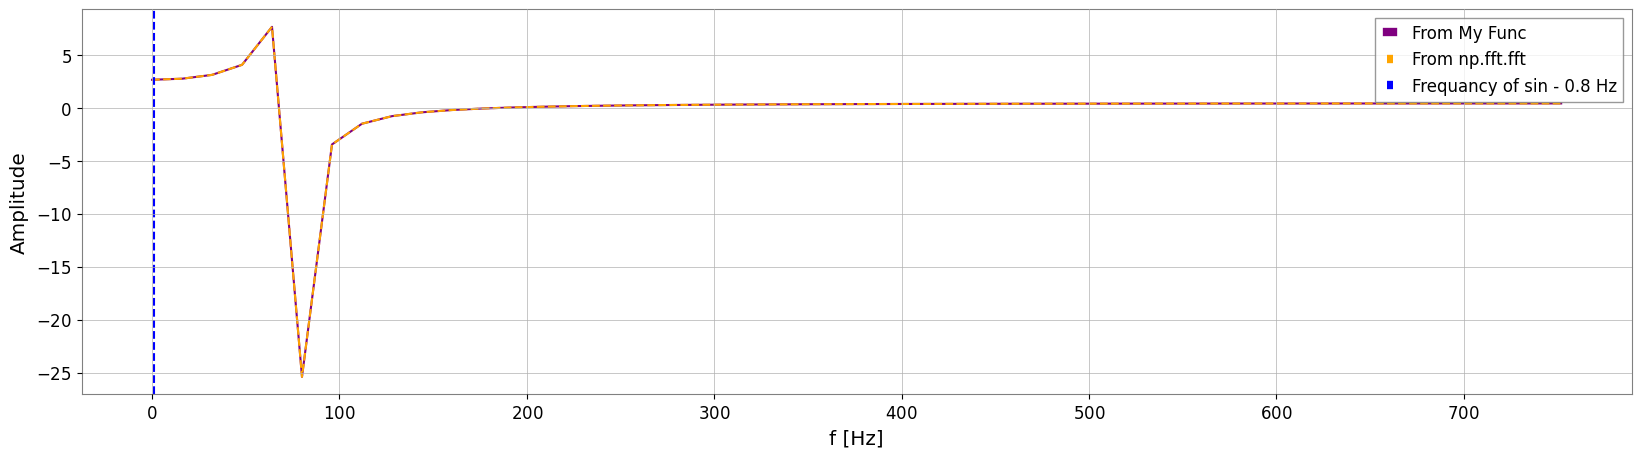

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# figure size
plt.figure(figsize=(20,5))

# plotting
plt.plot(f_out, f_series_out, color='purple', label=f'From My Func')
plt.plot(f_out, frequancyseries, color='orange', linestyle ='--', label=f'From np.fft.fft')
plt.axvline(frequency, color='blue', linestyle ='--', label=f'Frequancy of sin - {frequency} Hz' )

# axis / titile / legend
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.legend(loc="best")

# show plot
plt.show()



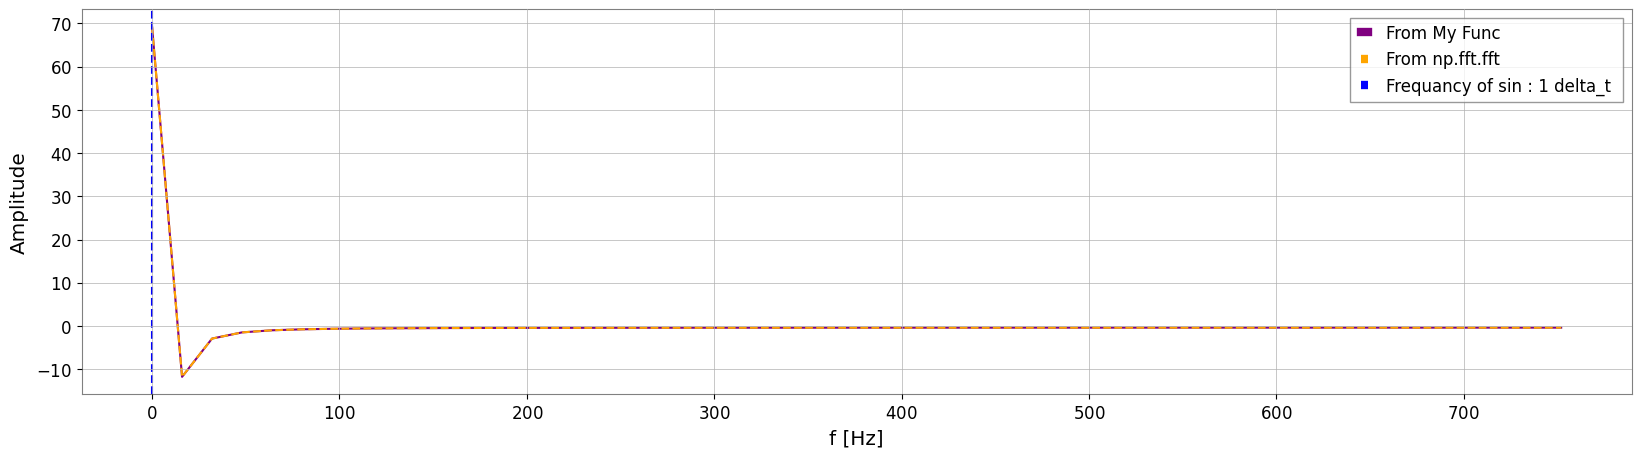

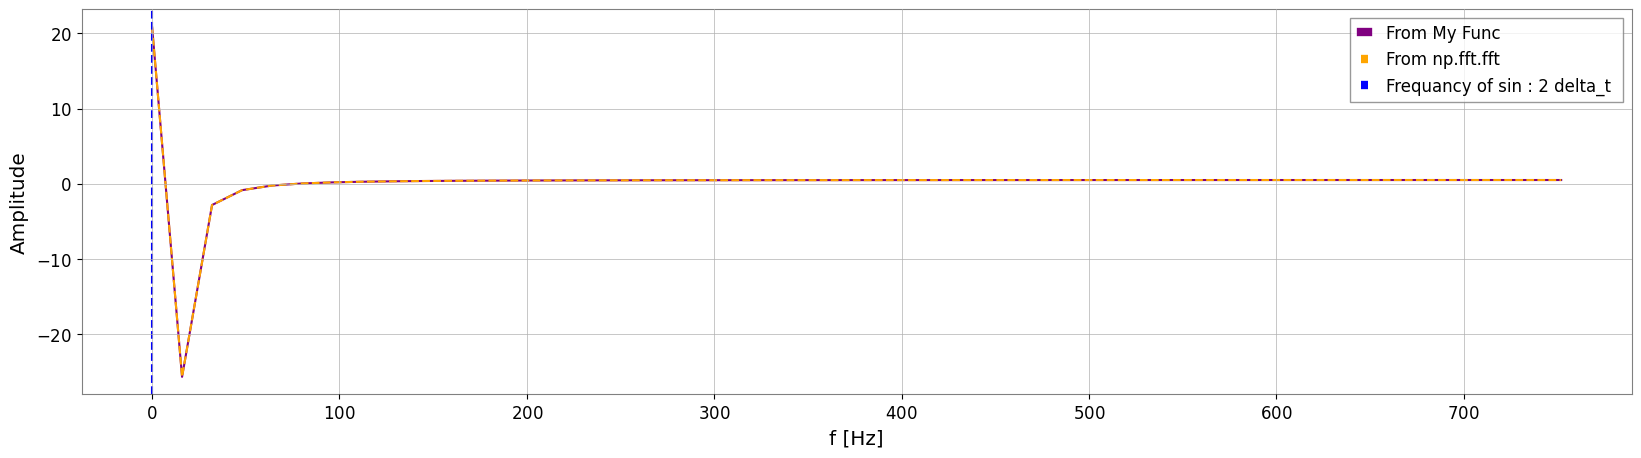

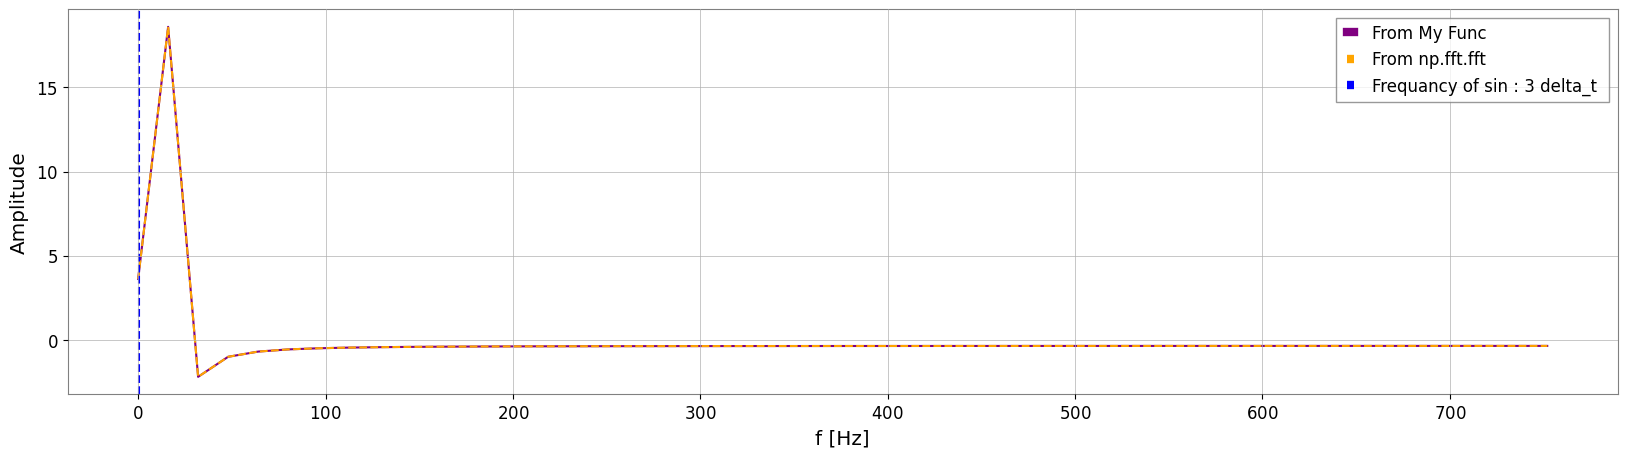

In [77]:
# Now changing values!
import numpy as np
for i in range(1,4):
  duration = 6 # s
  sampling_frequency = 16 # 1/s
  delta_t = 1 / sampling_frequency
  t0 = 0 # s
  frequency = (1/sampling_frequency) * i
  time = np.arange(0, duration, delta_t)
  timeseries = np.sin(2 * np.pi * time * frequency)

  # using my function
  f_out,f_series_out = DTFT(time,timeseries)
  # print(f"The f: \n {f_out} \n \n The f_series: \n {f_series_out}") # printing the output

  # Now using np.fft.fft
  frequancyseries_full = np.fft.fft(timeseries)
  # print(duration/delta_t)
  N = duration/delta_t
  frequancyseries = frequancyseries_full[0:int(N/2)]
  # print(frequancyseries)

  import matplotlib.pyplot as plt
  import numpy as np

  # figure size
  plt.figure(figsize=(20,5))

  # plotting
  plt.plot(f_out, f_series_out, color='purple', label=f'From My Func')
  plt.plot(f_out, frequancyseries, color='orange', linestyle ='--', label=f'From np.fft.fft')
  plt.axvline(frequency, color='blue', linestyle ='--', label=f'Frequancy of sin : {i} delta_t ' )

  # axis / titile / legend
  plt.xlabel('f [Hz]')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")

  # show plot
plt.show()

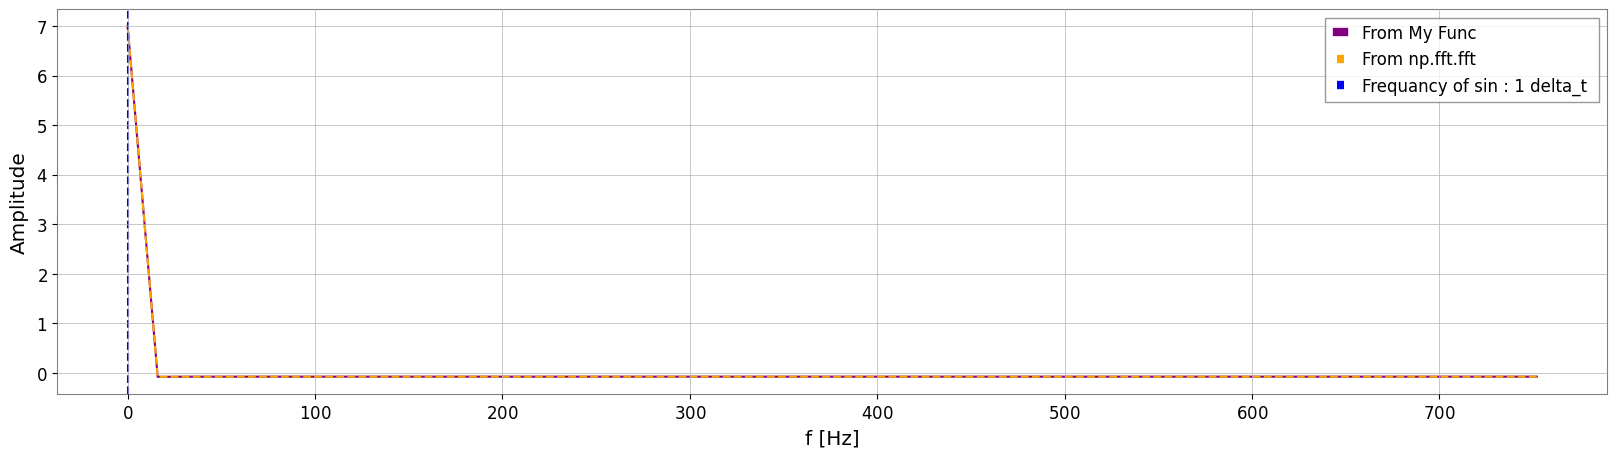

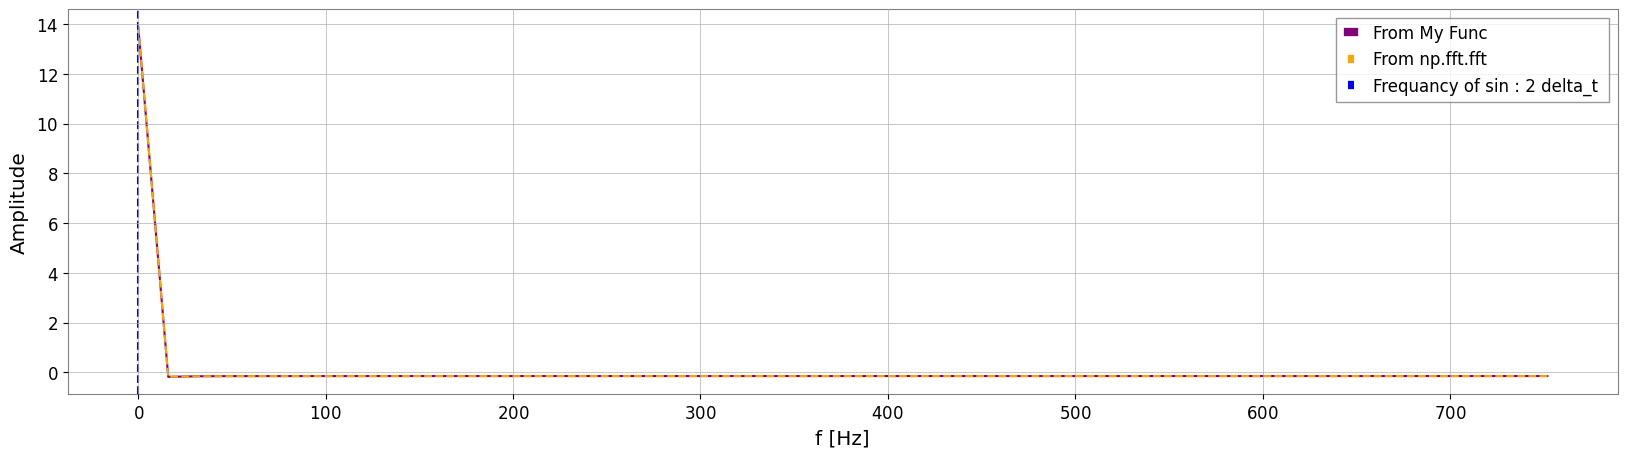

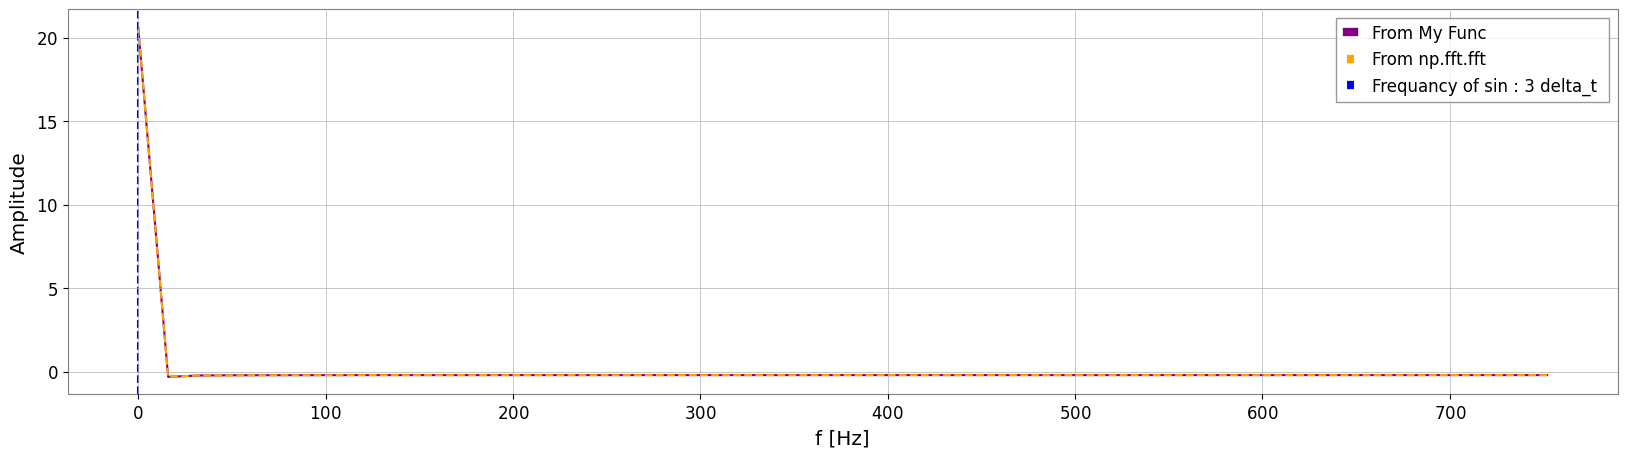

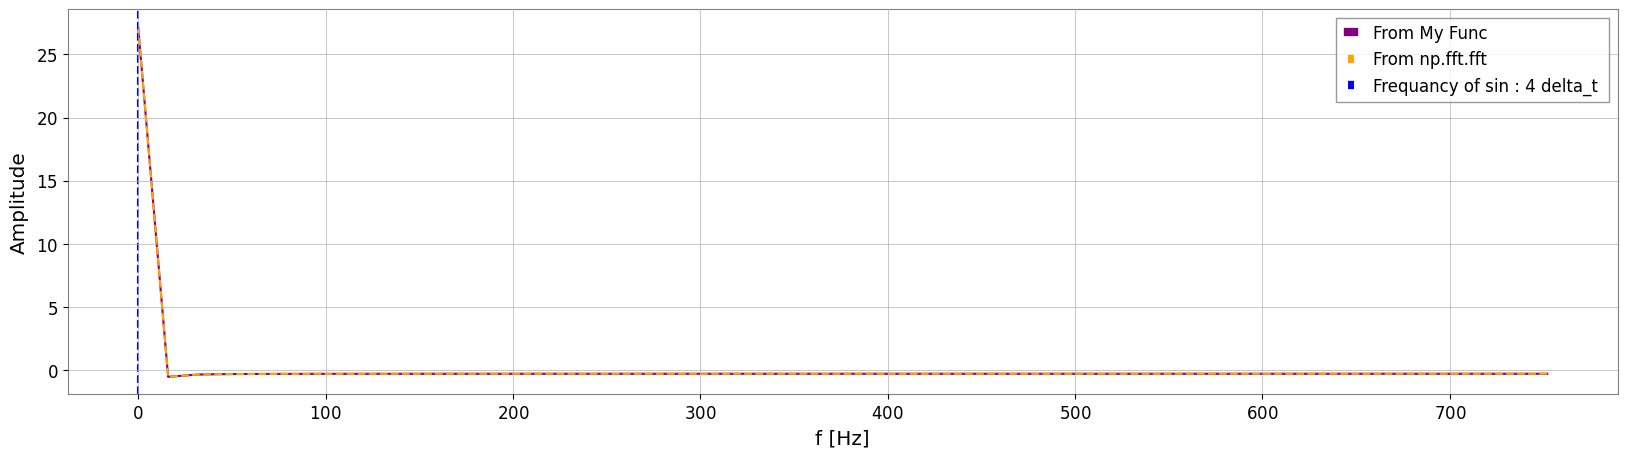

In [78]:
# Now changing values!
import numpy as np
for i in range(1,5):
  duration = 6 # s
  sampling_frequency = 16 # 1/s
  delta_t = 1 / sampling_frequency
  t0 = 0 # s
  frequency = ((delta_t**2)) * i
  time = np.arange(0, duration, delta_t)
  timeseries = np.sin(2 * np.pi * time * frequency)

  # using my function
  f_out,f_series_out = DTFT(time,timeseries)
  # print(f"The f: \n {f_out} \n \n The f_series: \n {f_series_out}") # printing the output

  # Now using np.fft.fft
  frequancyseries_full = np.fft.fft(timeseries)
  # print(duration/delta_t)
  N = duration/delta_t
  frequancyseries = frequancyseries_full[0:int(N/2)]
  # print(frequancyseries)

  import matplotlib.pyplot as plt
  import numpy as np

  # figure size
  plt.figure(figsize=(20,5))

  # plotting
  plt.plot(f_out, f_series_out, color='purple', label=f'From My Func')
  plt.plot(f_out, frequancyseries, color='orange', linestyle ='--', label=f'From np.fft.fft')
  plt.axvline(frequency, color='blue', linestyle ='--', label=f'Frequancy of sin : {i} delta_t ' )

  # axis / titile / legend
  plt.xlabel('f [Hz]')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")

  # show plot
plt.show()

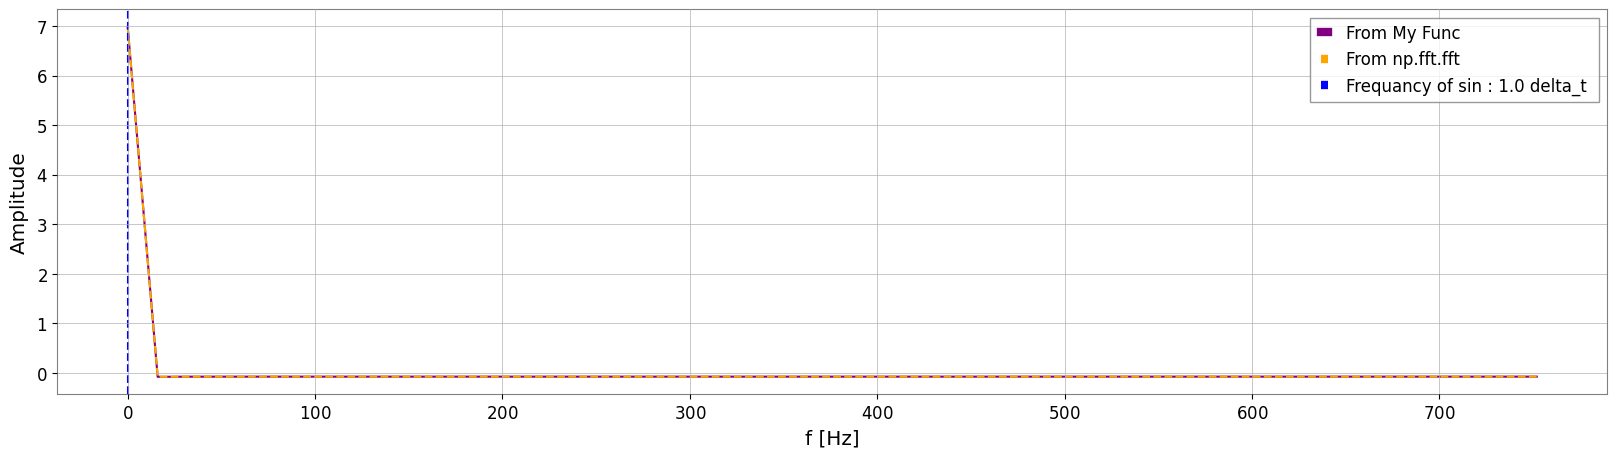

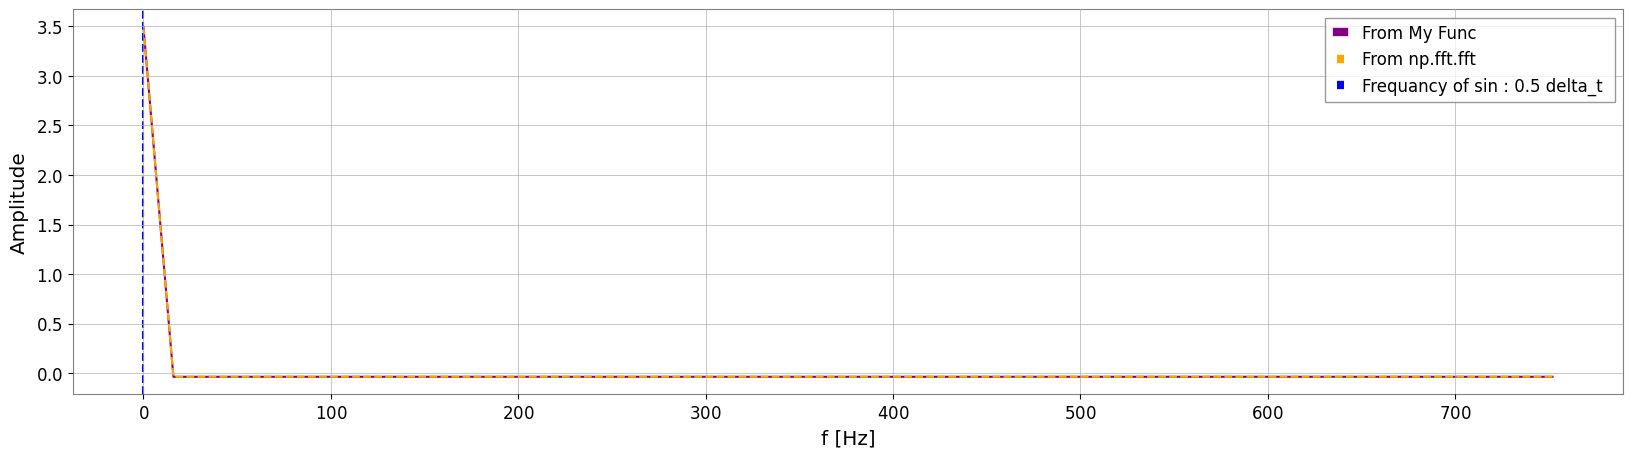

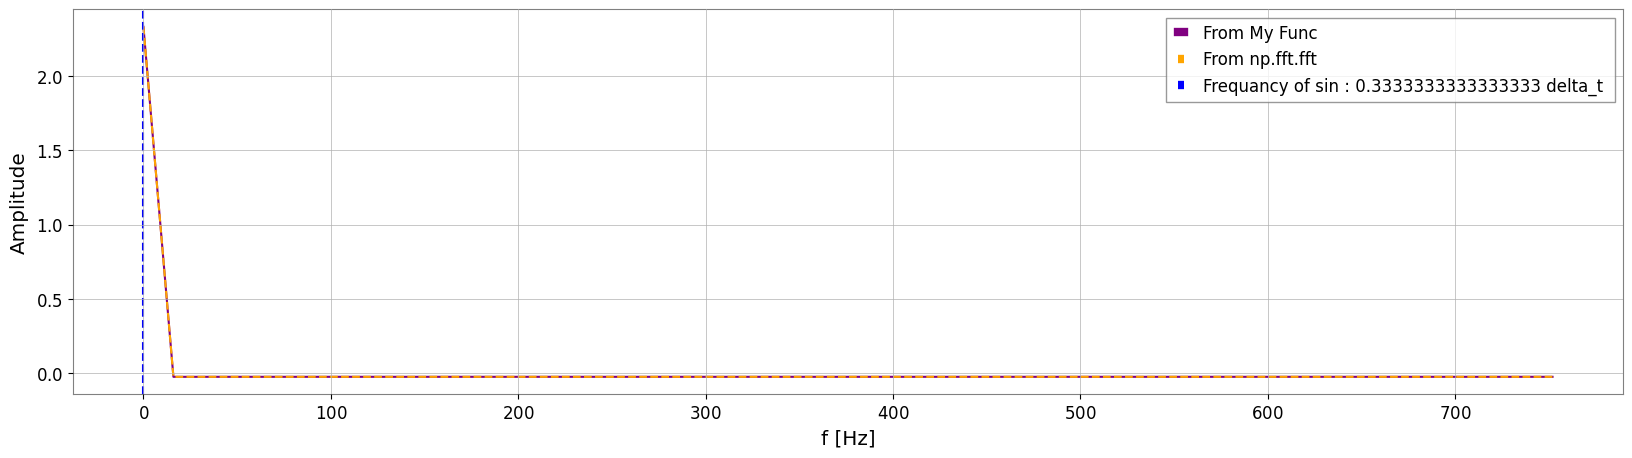

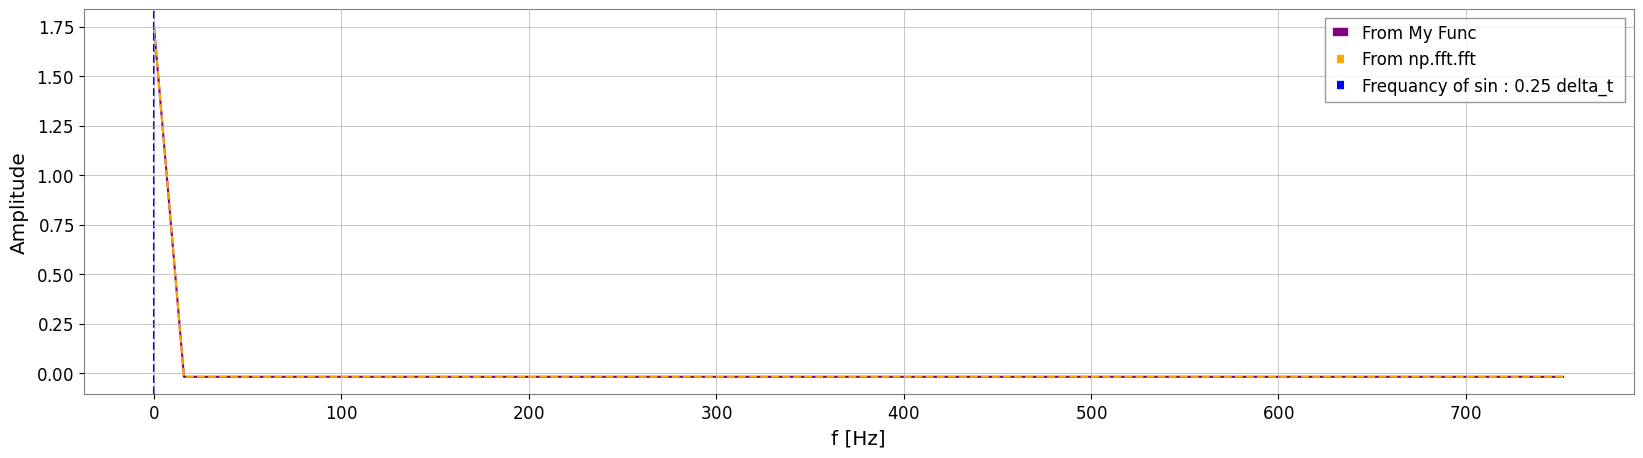

In [79]:
# Now changing values!
import numpy as np
for i in range(1,5):
  duration = 6 # s
  sampling_frequency = 16 # 1/s
  delta_t = 1 / sampling_frequency
  t0 = 0 # s
  frequency = ((delta_t**2)) / i
  time = np.arange(0, duration, delta_t)
  timeseries = np.sin(2 * np.pi * time * frequency)

  # using my function
  f_out,f_series_out = DTFT(time,timeseries)
  # print(f"The f: \n {f_out} \n \n The f_series: \n {f_series_out}") # printing the output

  # Now using np.fft.fft
  frequancyseries_full = np.fft.fft(timeseries)
  # print(duration/delta_t)
  N = duration/delta_t
  frequancyseries = frequancyseries_full[0:int(N/2)]
  # print(frequancyseries)

  import matplotlib.pyplot as plt
  import numpy as np

  # figure size
  plt.figure(figsize=(20,5))

  # plotting
  plt.plot(f_out, f_series_out, color='purple', label=f'From My Func')
  plt.plot(f_out, frequancyseries, color='orange', linestyle ='--', label=f'From np.fft.fft')
  plt.axvline(frequency, color='blue', linestyle ='--', label=f'Frequancy of sin : {1/i} delta_t ' )

  # axis / titile / legend
  plt.xlabel('f [Hz]')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")

  # show plot
plt.show()

It is clear that with a freqancy of $0.8$ Hz niether of the freqancy series peak at the $sin$ freuancy.

$\frac{1}{f}$ = T so $f = \frac{1}{T}$ so $\Delta f = -\frac{1}{T^2} \Delta T$

so it is proportional to $\frac{1}{T^2}$ which is proportional to $\frac{1}{{\Delta t}^2}$ beacuse $T = N \times \Delta t$


From what I see in my plotting I got that $\frac{{\Delta t}^2}{n} = \frac{1}{n{f_s}^2}$ and ${{\Delta t}^2} \times {n} = \frac{n}{{f_s}^2}$ where n is an integer (n = 1,2,3,4...), worked! But not really with the inverse of ${\Delta t}^2$ times or divide n.

The changes or additions I made including changing the $f$ for the $sin$ wave and going through quite a few itterations like trying to work with integers times or divided from $\Delta t$ and $T$ and even the sampling freqancy to see what worked and some did, but I eneded with the relation to ${{\Delta t}^2}$ becuase I got that from the uncertaint of $f$.



I got : "DTFT time: 0.01971435546875" and "FFT time: 0.00027251243591308594" by importing "time" which had to be re named as I already had something named time.

But this shows that FFT is so much faster by an order of 0.2 ms to 20 ms so 100 times faster! So fft would make perfect sense to use to speed up calculation time especially with massive datat sets.



# Question 3

1. Add white noise with a standard deviation of **σ = 0.5** to the time series you produced in Q2,
2. calculate the frequency series
3. plot the magnitude of this
4. Comment on the difference between **this figure** and the figure generated in **Q2**, explaining any **differences** you see.

[3 marks | Running total = 13/30]

<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2517300943.py:57: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(f_out_w_noise, f_series_out_w_noise, color='purple', label=f'DTFT with white noise $\sigma = 0.5$')


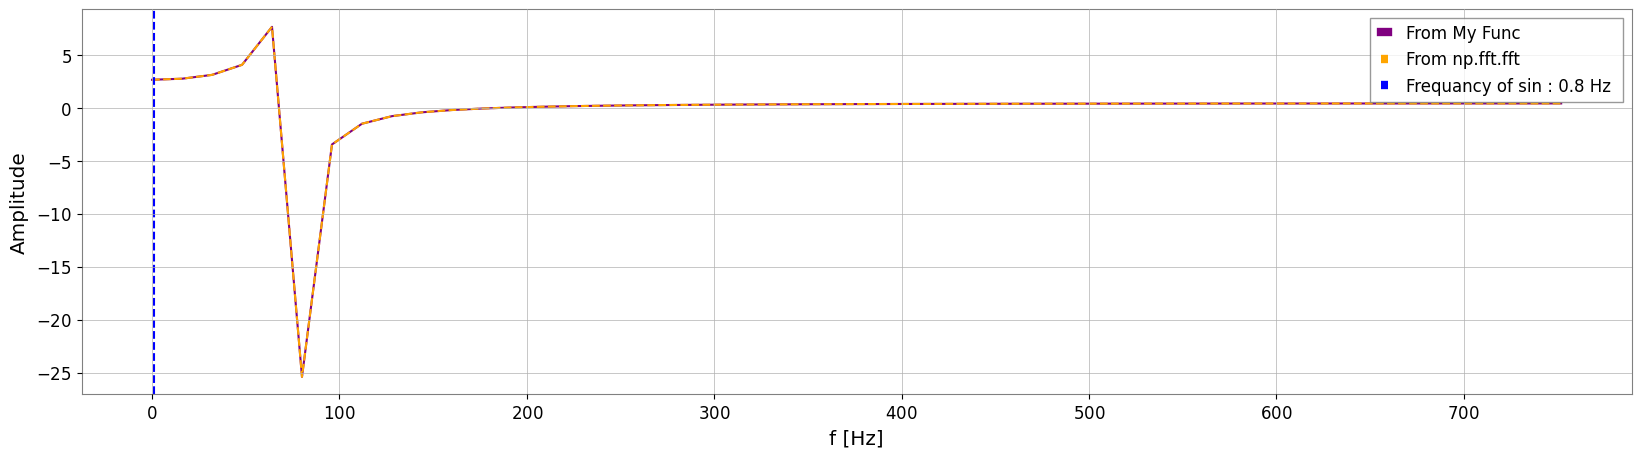

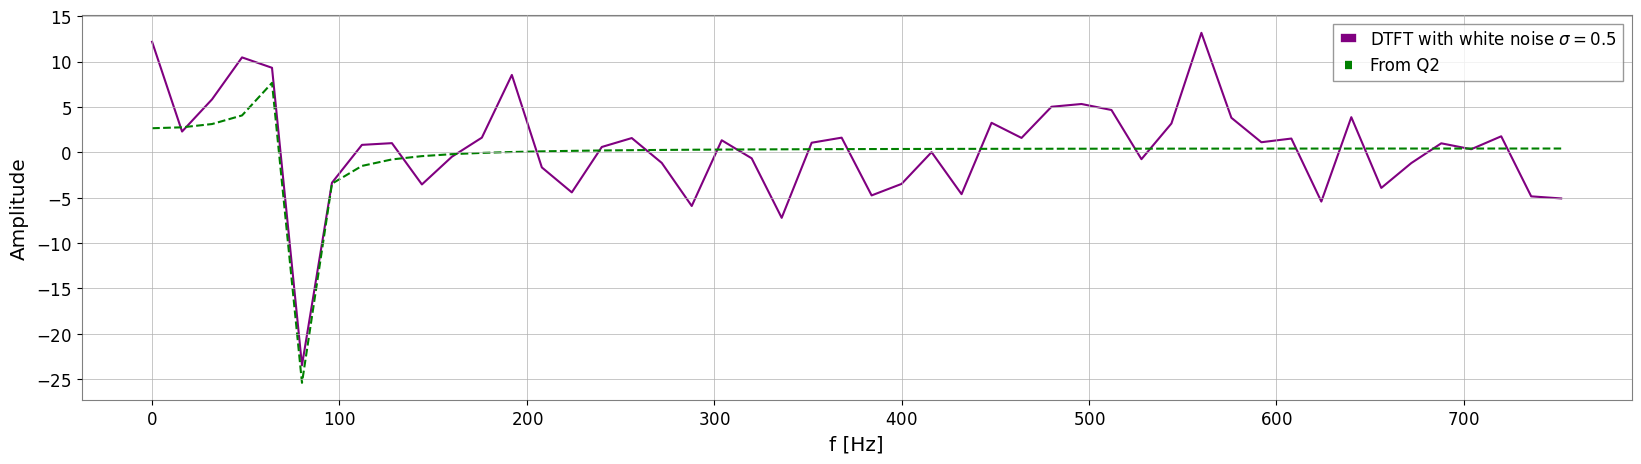

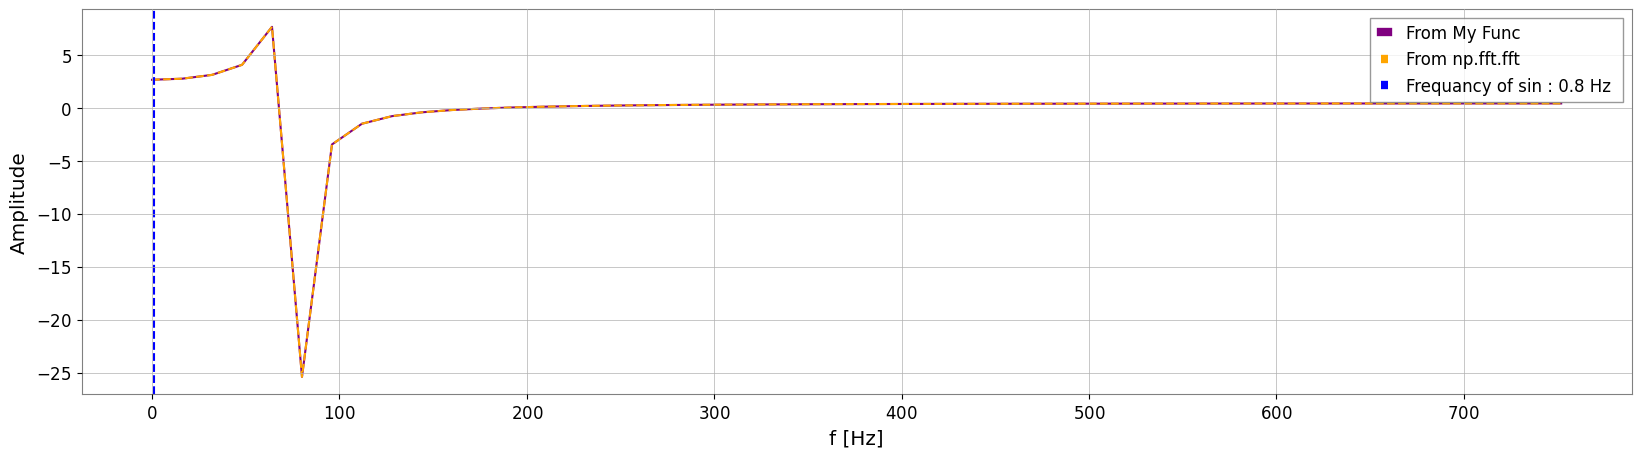

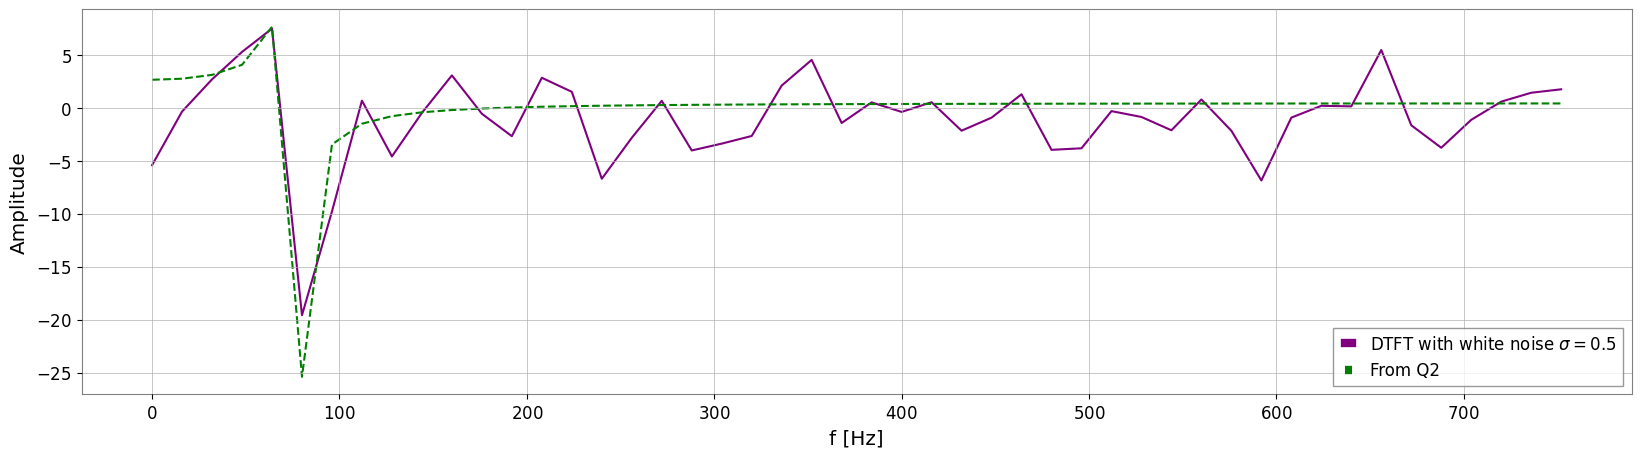

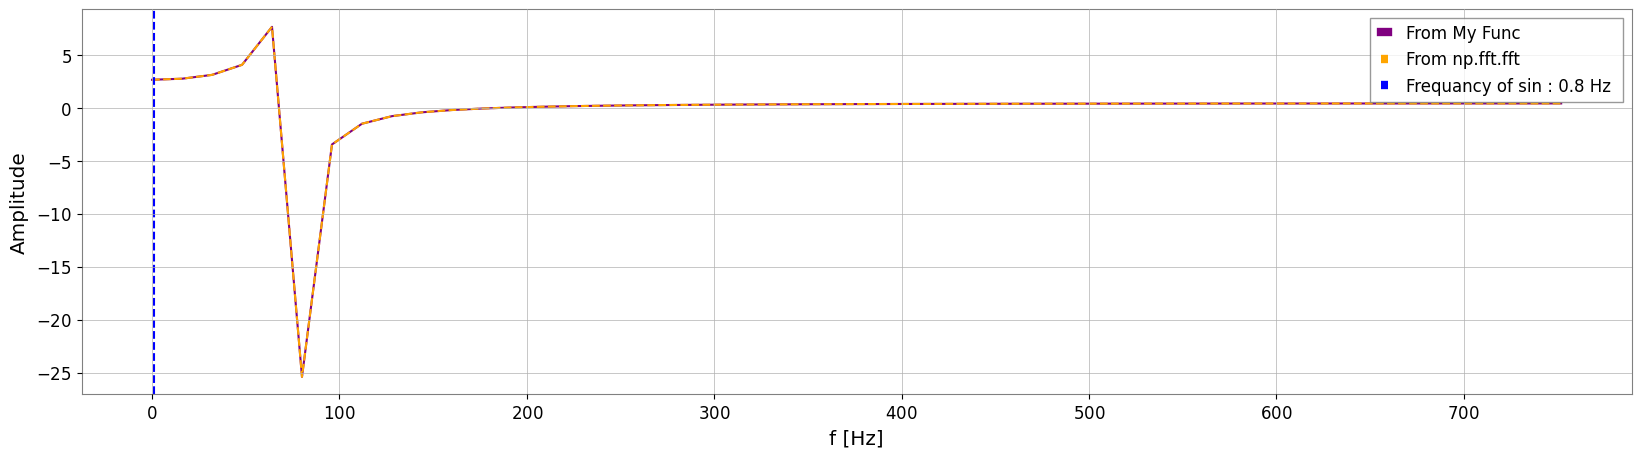

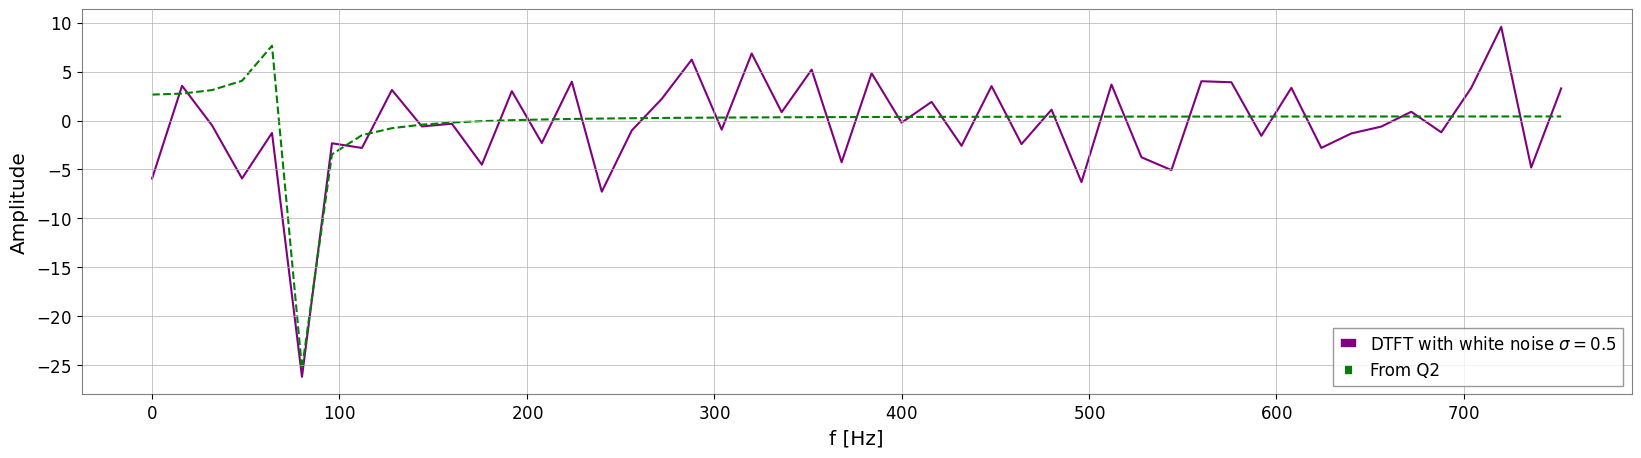

In [80]:
# Coppied the code that I collected in one box so that it works for Q3 now
import numpy as np
for i in range(0,3):
  duration = 6 # s
  sampling_frequency = 16 # 1/s
  delta_t = 1 / sampling_frequency
  t0 = 0 # s
  frequency = 0.8
  time = np.arange(0, duration, delta_t)
  timeseries = np.sin(2 * np.pi * time * frequency)

  # using my function
  f_out,f_series_out = DTFT(time,timeseries)
  # print(f"The f: \n {f_out} \n \n The f_series: \n {f_series_out}") # printing the output

  # Now using np.fft.fft
  frequancyseries_full = np.fft.fft(timeseries)
  # print(duration/delta_t)
  N = duration/delta_t
  frequancyseries = frequancyseries_full[0:int(N/2)]
  # print(frequancyseries)

  import matplotlib.pyplot as plt
  import numpy as np

  # figure size
  plt.figure(figsize=(20,5))

  # plotting
  plt.plot(f_out, f_series_out, color='purple', label=f'From My Func')
  plt.plot(f_out, frequancyseries, color='orange', linestyle ='--', label=f'From np.fft.fft')
  plt.axvline(frequency, color='blue', linestyle ='--', label=f'Frequancy of sin : 0.8 Hz ' )

  # axis / titile / legend
  plt.xlabel('f [Hz]')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")

  # show plot
  plt.show()

  import matplotlib.pyplot as plt
  import numpy as np

  # noise making
  sigma = 0.5
  w_noise = np.random.normal(0, sigma, len(timeseries)) # just noise
  t_s_w_noise = timeseries + w_noise # combined


  f_out_w_noise, f_series_out_w_noise = DTFT(time,t_s_w_noise) # f with noise functions from my DTFT

  # figure size
  plt.figure(figsize=(20,5))

  # plotting
  plt.plot(f_out_w_noise, f_series_out_w_noise, color='purple', label=f'DTFT with white noise $\sigma = 0.5$')
  plt.plot(f_out, f_series_out, color='green', linestyle = "--", label=f'From Q2')

  # axis / titile / legend
  plt.xlabel('f [Hz]')
  plt.ylabel('Amplitude')
  plt.legend(loc="best")

  # show plot
  plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1107860804.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(f_out_w_noise, f_series_out_w_noise, color='purple', label=f'DTFT with white noise $\sigma = 0.5$')


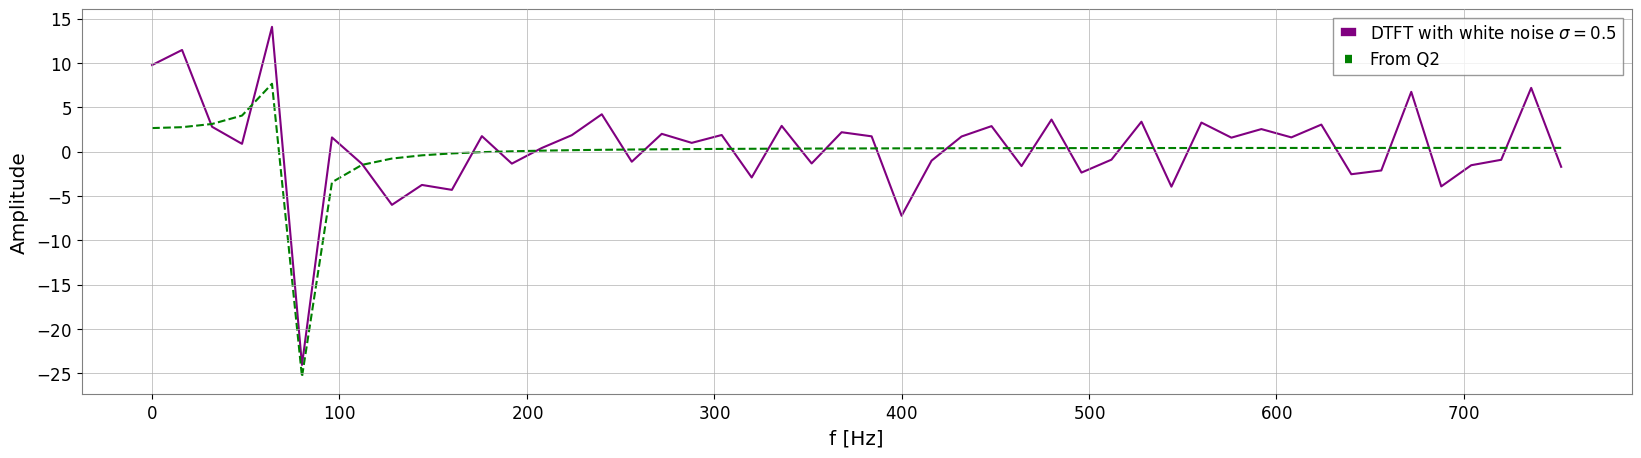

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# noise making
sigma = 0.5
w_noise = np.random.normal(0, sigma, len(timeseries)) # just noise
t_s_w_noise = timeseries + w_noise # combined


f_out_w_noise, f_series_out_w_noise = DTFT(time,t_s_w_noise) # f with noise functions from my DTFT

# figure size
plt.figure(figsize=(20,5))

# plotting
plt.plot(f_out_w_noise, f_series_out_w_noise, color='purple', label=f'DTFT with white noise $\sigma = 0.5$')
plt.plot(f_out, f_series_out, color='green', linestyle = "--", label=f'From Q2')

# axis / titile / legend
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.legend(loc="best")

# show plot
plt.show()





In terms of differances it is clear that the new noised signal is more bumpy than the noiseless signal. Makes sesne as the noise creats the discrepancies.

After writing out the code and getting the collected version from before I had the idea of trying out the noise adding multiple times and that helps me understand the diffrances a lot more.

And now it is clear that the dip is much closly plotted to the original, which makes sesne as the dip is at such an extrem compare to the average of the data, so if I were to increase the sigma for the noise this would then be lese and less well plotted.

Similar logic applies to the peak, and well that is where that sigma, if it was lower then the peak would be matched alot better.

In other words the more extrem is what is best to find when noise is preseance.

# Question 4

1. For a binary black hole merger consisting of **two 15 $𝑀_⊙$ black holes**
- what **duration of data** and **sampling frequency is needed** to ensure the **signal is not aliased or experiencing leakage**?
- You should assume the **signal enters** the sensitivity band of the detector at **20 Hz**, **give your answers as powers of 2**, and **justify the values**.

Hint: You will need to **approximate the maximum frequency** by comparing the orbital radius with the radius of the black holes
[5 marks | Running total = 18/30]

Radius of black hole should be from Shwartschild $R_s$:

$R_s = \frac{2GM}{c^2}$

Where:

$G = 6.67 \times 10^{-11} m^3kg^{-1}s^{-2} $

$ c = 3 \times 10^8 ms^{-1}$

and

$𝑀_⊙ = 1.99 \times 10^{30} kg$

if $M = 15 𝑀_⊙$ then $R_s^{M = 15𝑀_⊙} = 44244.333... m $

<!-- so 1 BH of $R_s = 44244.333... m$ means closest radius their orbit could be for $f_{orbit}^{max}$ is tripple based on the "Innermost stable circular orbit" which is $3R_s$ $3R_s = 132733 m$. -->

so 1 BH of $R_s = 44244.333... m$ means closest radius their orbit could be for $f_{orbit}^{max}$ is $R_s = 44244.333... m$.

$f_{orbit}^{max} = \frac{\omega}{2\pi} = \frac{v}{2\pi r} = \frac{(GM/R_s)^{0.5}}{2\pi R_s} =  \frac{(GM)^{0.5}}{2\pi (R_s)^{1.5}} $

$f_{orbit}^{max} = 1079.1547... Hz$

hence

### $f_{GW}^{max} = 2 \times f_{orbit}^{max} = 2158.3095... Hz$

To then avoid aliasing the sampeling freqancy must be twice or more the $f_{GW}^{max}$:

$f_{sample} \geqslant 4316.619 Hz$

so for no aliasing use:

# $f_{sample} = 2^{13}Hz = 8192Hz$

as $log_2(4316.619) = 12.075...$

now duration data:

based on the min and max freqancies $f_{min} = 20Hz$ so $t_{max} = 0.5s$ and $f_{max} = 2158.3095...Hz$ so $t_{min} = 0.0004633...s$

so duration (T) is:
#$ T = 0.5s - 0.0004633...s = 0.4995366...s = 0.500s$ to $3$ significant figures







# Question 5

1. Generate **two spectrograms** for data from LIGO Livingston **(L1)** and LIGO Hanford **(H1)** for data surrounding **GW150914** (trigger time is **1126259462.42**), the first binary black hole merger observed.
2. Do the two **signals arrive** at the same time?
3. What is the **significance** of your finding?

Hint: you can find the time that the signal peaks at 100Hz using the following expression:
where hq is the output of the q_transform method.

[3 marks | Running total = 21/30]

In [82]:
# data download, using "-q" to hide output
! wget -q https://www.gw-openscience.org/GW150914data/P150914/fig1-observed-H.txt # downloads H data
! wget -q https://www.gw-openscience.org/GW150914data/P150914/fig1-observed-L.txt # downloads L data


In [83]:
!pip install -q gwpy

Fetched 1 URLs from gwosc.org for [1126259460 .. 1126259465))
Reading data... [Done]
peak_time: 
 1126259462.408848 s


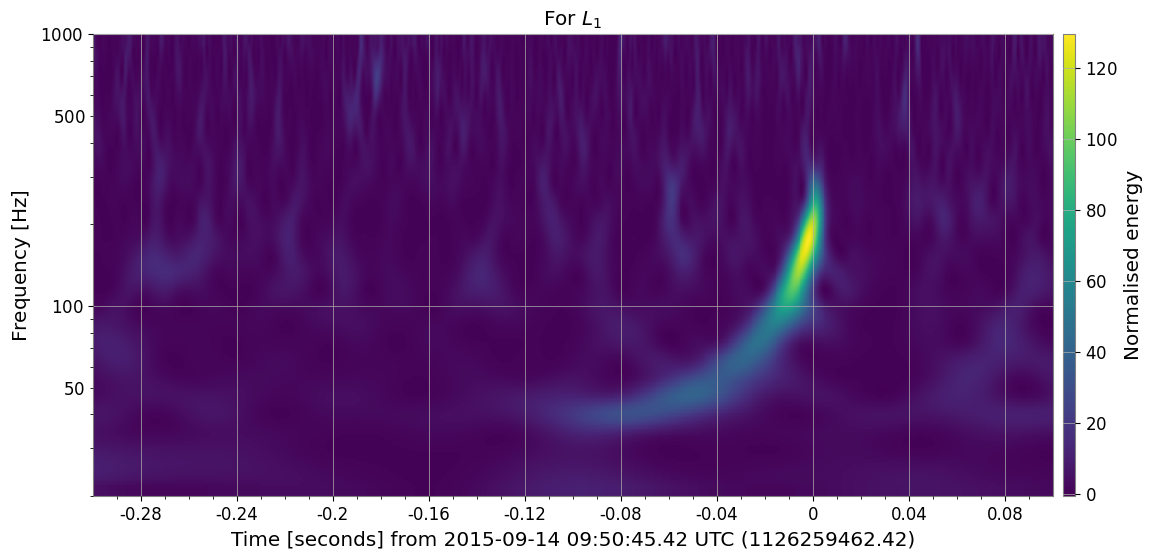

In [84]:
# from notes - Listing 3.8.1 pg. 65

# for L data

from gwpy.timeseries import TimeSeries
trigger_time = 1126259462.42 # value of triger time
start_time = trigger_time - 2
end_time = trigger_time + 2
timeseries_L1 = TimeSeries.fetch_open_data(
'L1', start_time, end_time, cache=True, verbose=True
) # making a time series by getting the data of L1 between the given times. Cahe to save a local copy, verbose for live update on download
hq = timeseries_L1.q_transform(
   frange=(20, 1000),
   qrange=(5, 50),
   outseg=(trigger_time - 0.3, trigger_time + 0.1)
) # simple comand for getting a spectogram with given frequancy and q range aswell as picked time segmant wanted "Scan a TimeSeries using the multi-Q transform and return an interpolated high-resolution spectrogram"
fig = hq.plot() # ploting
ax = fig.gca()
ax.set_epoch(trigger_time)
ax.set_yscale('log')
ax.set_title(f'For $L_1$')
ax.colorbar(label="Normalised energy")

peak_time_l = hq.times.value[np.argmax(hq[:, np.argmin(np.abs(hq.frequencies.value-100))])]
print(f'peak_time: \n {peak_time_l} s')

Fetched 1 URLs from gwosc.org for [1126259460 .. 1126259465))
Reading data... [Done]
peak_time: 
 1126259462.4156492 s


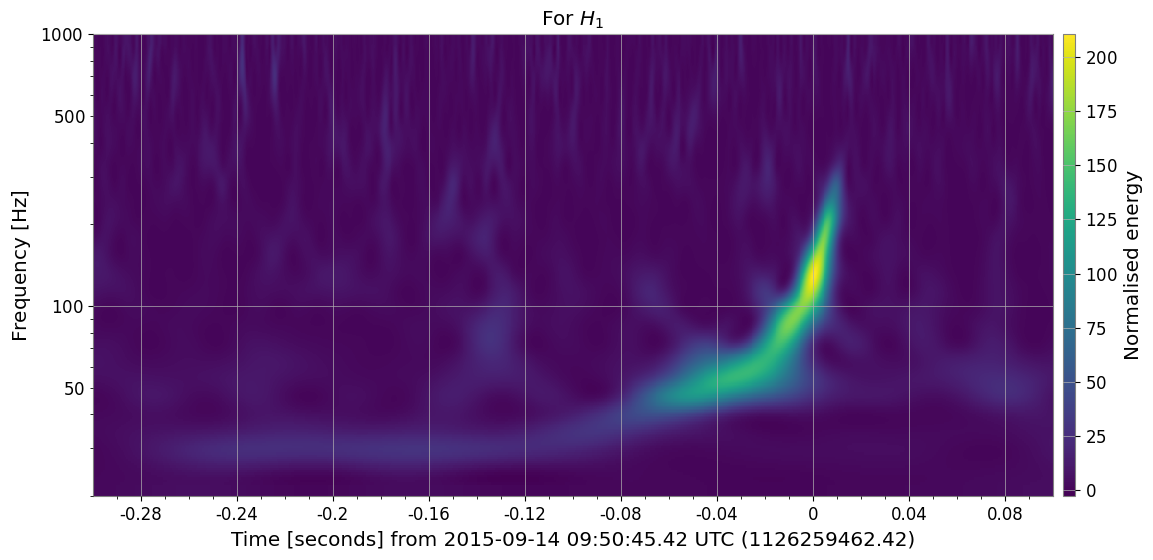

In [85]:
# for H data

from gwpy.timeseries import TimeSeries
trigger_time = 1126259462.42
start_time = trigger_time - 2
end_time = trigger_time + 2
timeseries_H1 = TimeSeries.fetch_open_data(
'H1', start_time, end_time, cache=True, verbose=True
)
hq = timeseries_H1.q_transform(
   frange=(20, 1000),
   qrange=(5, 50),
   outseg=(trigger_time - 0.3, trigger_time + 0.1)
)
fig = hq.plot()
ax = fig.gca()
ax.set_epoch(trigger_time)
ax.set_yscale('log')
ax.set_title(f'For $H_1$')
ax.colorbar(label="Normalised energy")

peak_time_h = hq.times.value[np.argmax(hq[:, np.argmin(np.abs(hq.frequencies.value-100))])]
print(f'peak_time: \n {peak_time_h} s')

In [86]:
# from finding the 100Hz peaks and subtracting the times at which they were seen from both.
print(f'differances in peak_time h - l: \n {peak_time_h - peak_time_l} s')

differances in peak_time h - l: 
 0.006801128387451172 s


So the signal was recived by H, 6.80 ms after L. So seen in both means the idea of it being noise is out of the picture and the 6.80 ms delay would be due to the spead of the wave? So clearly arriving at the same time

https://www.ligo.caltech.edu/WA/page/ligo-detectors

3002km distance in 6.8ms so 1.47c or faster cause this was the shortest distanc ebetween them - ummm so its faster than the speed of light??? Surely not!!!?


for 1c distance needs to be 2040000.0 m = 2040km so in other words you can do that by not going fully diagonally yey! Physics is intact.

If speed was less than c then m would decrease too so techincally a lower bound for the spead of GWs could be found! (Based on vertical or horrizontal distance between the two)

# Question 6
- Obtain **256s of Livingston data** just before GW150914
- and from this data **calculate the PSD** using **8s segments**.
- You should **first downsample the data to 1024Hz** and
- implement Welch’s method **(Algorithm 2)** with an **overlap of 50%, median averaging, and a Hann window**.
- **Plot the ASD** (the square root of the PSD) alongside the **frequency-domain data**.



You may wish to compare with the official LIGO PSD, which can be obtained by downloading the file GW150914_data.h5 from this location and then running the following commands:
**[See in notes]**

Using either **your PSD** or the LIGO PSD (should your estimation of the PSD fail), **take an 8s-long duration of data around GW150914 and whiten the data**, then create a **plolt**.

You should apply the same data processing to the analysis data containing the signal as used to make the ASD.

Plot the timeseries and comment on the result.


# From Notes:

Algorithm 2 Welch’s method for estimating the power spectral density
 Given a time-series hi of N data points, where N = KM, M is the duration (in the number
 of data points) of the analysis data you want to analyse, and K is an integer. Welch’s method
 is:

 1. Split the time-series into L data segments, each of length M and overlapping by D
 points.

 (a) If D = M/2, the overlap is said to be 50%

 (b) If D = 0, the overlap is said to be 0%, this is the same as Bartlett’s method.

 2. For each segment, apply the window function, then the NDTFT, and then take the
 squared magnitude

 3. Calculate the average over the K segments

 4. The output is then an M/2-length array of power versus frequency

In [87]:
# getting the time series from the data

from gwpy.timeseries import TimeSeries
from scipy.signal import get_window

trigger_time = 1126259462.42 # value of triger time
start_time = trigger_time - 256 # thats how back I need it
end_time = trigger_time
timeseries_L1_Q6 = TimeSeries.fetch_open_data(
'L1', start_time, end_time, cache=True, verbose=True
) # making a time series by getting the data of L1 between the given times. Cahe to save a local copy, verbose for live update on download

# # checking my understanding
# print(timeseries_L1_Q6.size)
# print(timeseries_L1_Q6[1048576-1])
# print(timeseries_L1_Q6[0])
# print(timeseries_L1_Q6[-1])
# print(len(timeseries_L1_Q6))


Fetched 1 URLs from gwosc.org for [1126259206 .. 1126259463))
Reading data... [Done]


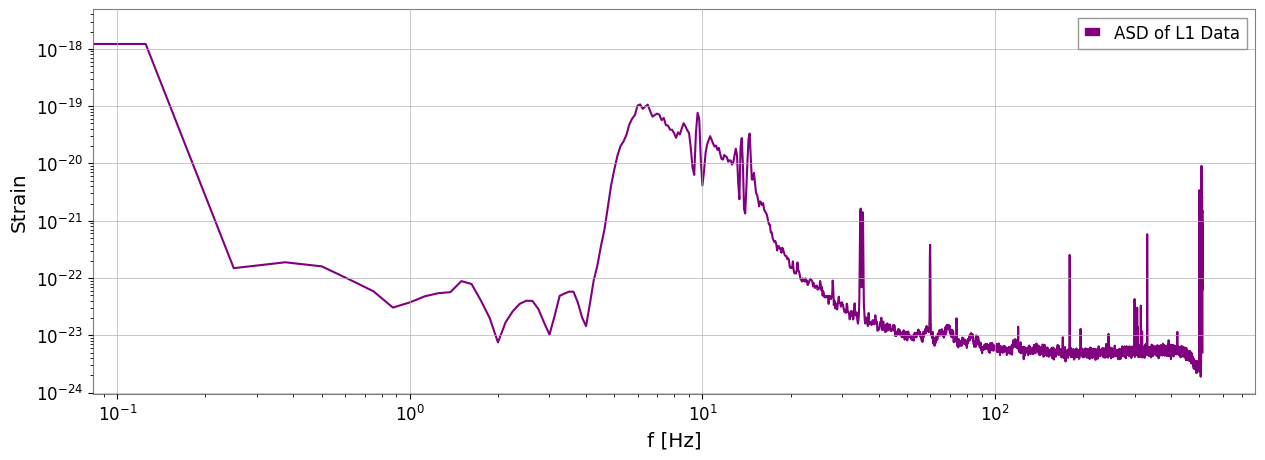

In [88]:
new_t_s = timeseries_L1_Q6.resample(1024) # the downsampling

# ------------

N = int(len(new_t_s)) # defined N

M = int(1024 * 8) # from 8s durations over 256s

K = int(N/M)

overlap_frac = 0.5 # 50 percent

D = int(overlap_frac * M)

L = int((K * 2) - 1) # based on geometry

# # Checking
# print(f"M = {M}")
# print(f"N = {N}")
# print(f"K = {K}")
# print(f"D = {D}")
# print(f"L = {L}")

# print(timeseries_L1_Q6)
# print(new_t_s)


window = get_window('hann', M) # the window
duration = 8
psd_segments = [] # as it will need to be psd ed in segmants

for i in range(0,L):
  # prints are checks
  # print(f"i={i}")
  stamp_i = new_t_s[(0+(D*i)):(M+(D*i))]
  # print(stamp_i)
  # print(f"len = {len(stamp_i)}")
  # print(stamps)
  stamp_windowed = stamp_i * window # for each
  # print(stamp_i.sample_rate)

  # calculate the RFFT (real as will be normalised) using numpy and well need sizes to match FFT will include imaginary and double the size
  np_fs = np.fft.rfft(np.array(stamp_windowed))

  # square mag and normalisation
  segment_psd = (np.abs(np_fs)**2) / (stamp_i.sample_rate * np.sum(window**2))

  psd_segments.append(segment_psd)

psd = np.median(np.array(psd_segments), axis = 0) # making it mean, axis = 0 so that it works, clearly none doesnt work on its own

asd = np.sqrt(psd) # by def

# creating the frequancy series
freqs = np.fft.rfftfreq(M, 1/stamp_i.sample_rate)

# Plotting
plt.figure(figsize=(15,5))
plt.plot(freqs, asd, color="purple", label = "ASD of L1 Data")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('Strain')
plt.legend(loc="best")

plt.show()





In [89]:
# # now getting the 8 s segment around the triger time so 8/2=4 s each side

# from gwpy.timeseries import TimeSeries
# from scipy.signal import get_window

# trigger_time = 1126259462.42 # value of triger time
# start_time = trigger_time - 4 # thats how back I need it
# end_time = trigger_time + 4
# timeseries_L1_Q6_b = TimeSeries.fetch_open_data(
# 'L1', start_time, end_time, cache=True, verbose=True
# ) # making a time series by getting the data of L1 between the given times. Cahe to save a local copy, verbose for live update on download

# # # checking my understanding
# # print(timeseries_L1_Q6_b.size)
# # print(timeseries_L1_Q6_b[0])
# # print(timeseries_L1_Q6_b[-1])
# # print(len(timeseries_L1_Q6_b))
# # print(timeseries_L1_Q6_b.duration) # 8s yes!!!

# # Also need to resize!
# new_t_s_b = timeseries_L1_Q6_b.resample(1024) # the downsampling
# # print(new_t_s_b.duration)
# # print(new_t_s_b)

# freqs_b_new_t_s_b = np.fft.rfft(new_t_s_b)
# new_f_s_part_b_whitened = np.sqrt((2*new_t_s_b.sample_rate)/new_t_s_b.duration)  * np.fft.ifft(freqs_b_new_t_s_b/np.sqrt(psd))
# new_t_s_b_w = np.fft.irfft(new_f_s_part_b_whitened, n=len(new_t_s_b)) # back to t series as I need that for the calculations

# window = get_window('hann', len(new_t_s_b_w)) # the window
# duration = 8 # and it does based on new_t_s_b.duration
# psd_segments_b = [] # as it will need to be psd ed in segmants

# for i in range(0,1):
#   stamp_i_b = new_t_s_b_w
#   stamp_windowed_b = stamp_i_b * window # for each (now only for one!)

#   # calculate the RFFT (real as will be normalised) using numpy and well need sizes to match FFT will include imaginary and double the size
#   np_fs = np.fft.rfft(np.array(stamp_windowed_b))

#   # square mag and normalisation
#   segment_psd_b = (np.abs(np_fs)**2) / (new_t_s_b.sample_rate * np.sum(window**2))

#   psd_segments_b.append(segment_psd_b) # well could be made redundant, but this works too.

# psd_b = np.median(np.array(psd_segments_b), axis = 0) # making it mean, axis = 0 so that it works, clearly none doesnt work on its own

# asd_b = np.sqrt(psd_b) # by def


# # creating the frequancy series
# freqs_b = np.fft.rfftfreq(len(new_t_s_b),1/new_t_s_b.sample_rate )

# # Plotting
# plt.figure(figsize=(15,5))
# plt.plot(freqs_b, asd_b, color="purple", label = "ASD of L1 Data with an 8 s duration about the event")
# # plt.plot(freqs, asd, label = "ASD of L1 Data") # the one from above just to check it is actually plotting something different
# plt.yscale('log')
# plt.xscale('log')
# plt.xlabel('f [Hz]')
# plt.ylabel('Strain')
# plt.legend(loc="best")
# plt.show()


In [90]:
# # Plotting
# plt.figure(figsize=(15,5))

# t_b = np.fft.irfft(freqs_b)

# plt.plot(t_b, new_t_s_b_w, color="purple", label = "ASD of L1 Data with an 8 s duration about the event")
# # plt.plot(freqs, asd, label = "ASD of L1 Data") # the one from above just to check it is actually plotting something different
# # plt.yscale('log')
# # plt.xscale('log')
# plt.xlabel('f [Hz]')
# plt.ylabel('Strain')
# plt.legend(loc="best")
# plt.show()

Fetched 1 URLs from gwosc.org for [1126259458 .. 1126259467))
Reading data... [Done]


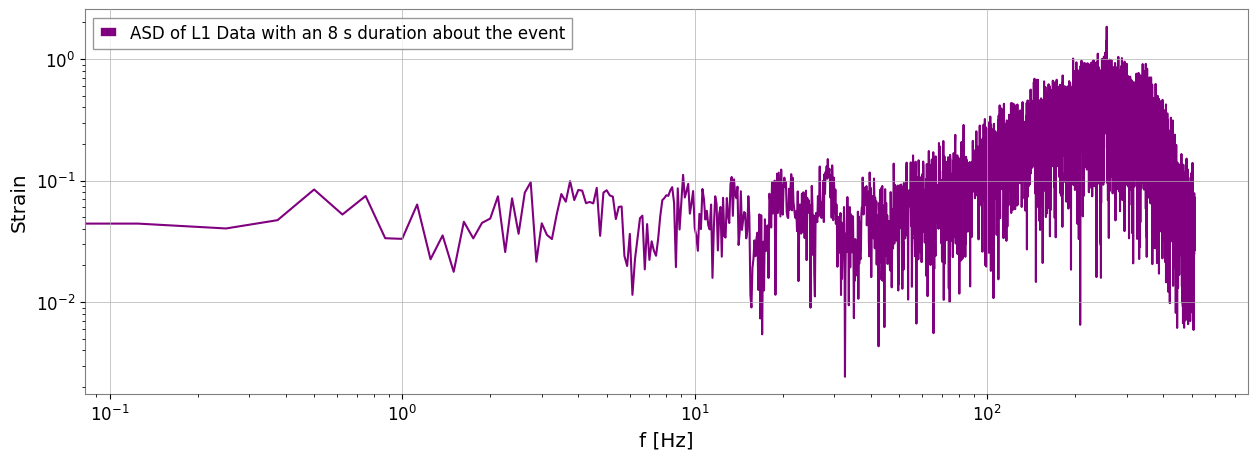

In [91]:
# now getting the 8 s segment around the triger time so 8/2=4 s each side

from gwpy.timeseries import TimeSeries
from scipy.signal import get_window

trigger_time = 1126259462.42 # value of triger time
start_time = trigger_time - 4 # thats how back I need it
end_time = trigger_time + 4
timeseries_L1_Q6_b = TimeSeries.fetch_open_data(
'L1', start_time, end_time, cache=True, verbose=True
) # making a time series by getting the data of L1 between the given times. Cahe to save a local copy, verbose for live update on download

# # checking my understanding
# print(timeseries_L1_Q6_b.size)
# print(timeseries_L1_Q6_b[0])
# print(timeseries_L1_Q6_b[-1])
# print(len(timeseries_L1_Q6_b))
# print(timeseries_L1_Q6_b.duration) # 8s yes!!!

# Also need to resize!
new_t_s_b = timeseries_L1_Q6_b.resample(1024) # the downsampling
# print(new_t_s_b.duration)
# print(new_t_s_b)


window = get_window('hann', len(new_t_s_b)) # the window
duration = 8 # and it does based on new_t_s_b.duration
psd_segments_b = [] # as it will need to be psd ed in segmants

for i in range(0,1):
  stamp_i_b = new_t_s_b
  stamp_windowed_b = stamp_i_b * window # for each (now only for one!)

  # calculate the RFFT (real as will be normalised) using numpy and well need sizes to match FFT will include imaginary and double the size
  np_fs = np.fft.rfft(np.array(stamp_windowed_b))

  new_f_s_part_b_whitened = np.sqrt((2*new_t_s_b.sample_rate)/new_t_s_b.duration)  * np.fft.ifft(np_fs/np.sqrt(psd)) # from notes (eq. 3.14)

  # square mag and normalisation
  segment_psd_b = (np.abs(new_f_s_part_b_whitened)**2) / (new_t_s_b.sample_rate * np.sum(window**2))

  psd_segments_b.append(segment_psd_b) # well could be made redundant, but this works too.

psd_b = np.median(np.array(psd_segments_b), axis = 0) # making it mean, axis = 0 so that it works, clearly none doesnt work on its own

asd_b = np.sqrt(psd_b) # by def


# creating the frequancy series
freqs_b = np.fft.rfftfreq(len(new_t_s_b),1/new_t_s_b.sample_rate )

# Plotting
plt.figure(figsize=(15,5))
plt.plot(freqs_b, asd_b, color="purple", label = "ASD of L1 Data with an 8 s duration about the event")
# plt.plot(freqs, asd, label = "ASD of L1 Data") # the one from above just to check it is actually plotting something different
plt.yscale('log')
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('Strain')
plt.legend(loc="best")
plt.show()


In [92]:
print(new_t_s_b.times) # that would be the time series for that

[1.12625946e+09 1.12625946e+09 1.12625946e+09 ... 1.12625947e+09
 1.12625947e+09 1.12625947e+09] s


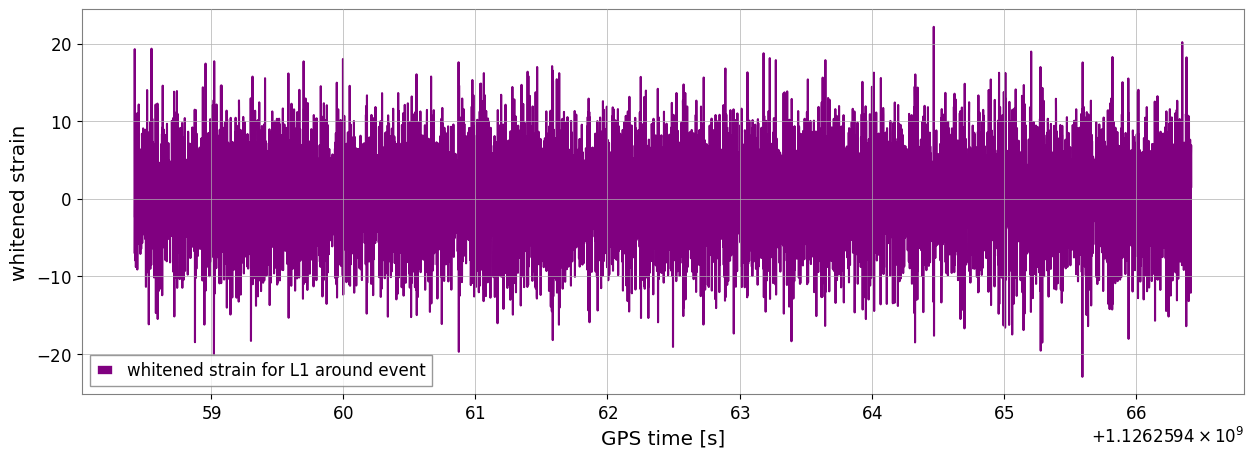

In [93]:
# Transform back to time domain
strain_whitened = np.fft.irfft(new_f_s_part_b_whitened) #well I need it from f to t (time sereis)

# Plotting
plt.figure(figsize=(15,5))
plt.plot(new_t_s_b.times.value, strain_whitened, color="purple", label = "whitened strain for L1 around event")
plt.xlabel("GPS time [s]")
plt.ylabel("whitened strain")
plt.legend(loc="best")
plt.show()


I have commented out the time where I tired to do th whitening and did it wrong and that was based on finding the 2nd part not looking like the course notes.

Also I attemnted to downlad the data and use it was not working for me, so I skipped that part. This skipping was also based on my tame management too. But that should be ok as my PSD worked and it was optional.